### PROBLEM STATEMENT
Throughout the years, there have been many artificial intelligence (AI) and machine learning (ML) applications towards the detection of early stages of Alzheimer's disease. There is also research and interest in finding how impactful Alzheimer's disease can be in the presence of other diseases, or even during more severe situations, such as an epidemic or pandemic. This project will focus on and explore datasets that relate to Alzheimer's disease and dementia, as well as their impact on other features within the given datasets.

The main goal and motiviation of this final project has two parts (consisting of two scenarios). For the first scenario, the goal is to determine if Alzheimer's disease is an effective factor with data related to the COVID19 pandemic (when tested with different predicting factors). As part of the second scenario of the project, the goal is more specific, which is to see if there is a strong correlation between age and gender features among individuals who have Alzheimer's disease or dementia (and determining if one can improve model accuracy for an applied machine learning model for this scenario). Results from the first objective will help researchers understand the level of impact that Alzheimer's disease can potentially have in the case of future pandemics. If the second part is acheivable, this will be beneficial for future research when selecting key features to use when analyzing Alzheimer's disease from other datasets.

To achieve both parts of the objective, a multilinear regression model is applied for the first scenario and an applied logistic regression model handles the second scenario. Multilinear regression helps in the first scenario when testing Alzheimer's Disease with other features from the dataset (in this case, most of the other features are represented by other diseases that took place during the COVID19 pandemic). Logistic regression is used for the second case, since one of the column features (gender) for the second scenario consists of categorical data and (in this case) results to one of two values (this helps in simplifying the classication process, since this will mainly be binary classification).


### DATA SOURCES
The data sources for this final project include the following sources listed below. Scenario one utilizes federal data from the U.S. Department of Health and Human Services (this dataset is available from a public source). This dataset focuses on the provisional counts of deaths (on a national level) by month between the years of 2020 and 2023, during the time of the COVID19 pandemic.

For scenario two, one of the datasets is also federal data (available from a public source) from the Centers for Disease Control and Prevention. Similar to the dataset for scenario one in terms of subject matter, this dataset contains data for contributing conditions to COVID19-related deaths (which is categorized by age group and gender). Two additional datasets for scenario two come from the Open Access Series of Imaging Studies (OASIS) Brains project. Both datasets focus on different MRI characteristics of patients and individuals, divided into two categories: demented and nondemented. The final dataset for scenario two is from Kaggle, and it is publicly accessible. This dataset includes information on Alzheimer features identified in a select group of individuals for a case study. Background information on individuals (age, education level, gender) is included as well as specific medical data such as CDR (Clinical Dementia Ratining) and ASF (Atlas Scaling Factor).


1.) U.S. Department of Health and Human Services, Centers for Disease Control and Prevention (2021). Monthly Counts of Deaths by Select Causes (2020-2021) [Data set]. Retrieved from https://catalog.data.gov/dataset/monthly-counts-of-deaths-by-select-causes-2020-2021-2785a



2.) Centers for Disease Control and Prevention. (2021). Conditions Contributing to Deaths Involving Coronavirus Disease 2019 (COVID-19) by Age Group [Data set]. Retrieved from https://catalog.data.gov/dataset/conditions-contributing-to-deaths-involving-coronavirus-disease-2019-covid-19-by-age-group


3.) Open Access Series of Imaging Studies (OASIS) Brains Project. Open Access Series of Imaging Studies (OASIS): Cross-sectional MRI Data in Young, Middle Aged, Nondemented, and Demented Older Adults (2007) [Data set]. Retrieved from https://www.oasis-brains.org/#oasis1



4.) Open Access Series of Imaging Studies (OASIS) Brains Project. Open Access Series of Imaging Studies (OASIS): Longitudinal MRI Data in Nondemented and Demented Older Adults (2010) [Data set]. Retrieved from https://www.oasis-brains.org/#oasis2


5.) Dincer, Baris (2022). Alzheimer Features (2022) [Data set]. Retrieved from https://www.kaggle.com/datasets/brsdincer/alzheimer-features



### DATASET DESCRIPTION

The monthly provisional dataset for scenario one is in a tabulated data format with features that include the following: provisional counts of deaths by cause of death, types of causes of death (natural causes, accidents, etc.), dates of deaths, and jurisdiction of where deaths occurred. For column size and row size, these values turn out to be 31 and 42 respectively. 

The 'contributing conditions' dataset for scenario two is in a tabulated data format. For column size and row size, these values turn out to be 14 and 583740 respectively. 

The OASIS cross-sectional MRI dataset for scenario two is in a tabulated data format. For column size and row size, these values turn out to be 12 and 436 respectively. 

The OASIS longitudinal demographics dataset for scenario two is in a tabulated data format. For column size and row size, these values turn out to be 15 and 373 respectively.

The 'alzheimer features' dataset for scenario two is in a tabulated data format. For column size and row size, these values turn out to be 10 and 373 respectively. 

### GITHUB REPOSITORY
The Github repository link for this final project is displayed below (to run this code and produce the proper results, make sure to follow the instructions in the README file in the Github repository):

https://github.com/IsraelsLibrary/DTSA_5509_Intro_to_Machine_Learning


### FINAL PROJECT  CODE

Below is the code for the DTSA 5509 Final Project.


In [58]:
# Importing required Python libraries for the final project (primarily, plotting and analysis tools as well as
# dataframe libraries)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

In [59]:
# Importing the required datasets for further processing

contributing_conditions_data = pd.read_csv('data/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv')
oasis_demographics_data = pd.read_excel('data/oasis_longitudinal_demographics.xlsx')
oasis_cross_sectional_data = pd.read_csv('data/oasis_cross-sectional.csv')
alzheimer_data = pd.read_csv('data/alzheimer.csv')
monthly_provisional_data = pd.read_csv('data/Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2023.csv')


In [60]:
# datasets for scenario 1:
## 1.) monthly_provisional_data

# datasets for scenario 2:
## 1.) contributing_conditions_data
## 2.) oasis_demographics_data
## 3.) oasis_cross_sectional_data
## 4.) alzheimer_data

### DATA CLEANING PROCESS

Upon further inspection of the monthly provisional dataset for scenario one, I discovered many columns that contained null values as well as missing entries. To handle this data, I established a four percent null value threshold to determine which features to drop and which features to impute. I applied the null value threshold for each column feature in the monthly provisional dataset.

In the case of datasets for scenario two, I created two 'helper' functions that removes any rows in the dataset that contains 'nan' values or null values. This process only occurs after data transformations take place in forming the dataset for scenario two (which is done by a third 'helper' function).

In [61]:
# A printout of the dataset for the first scenario, to show columns that contain null and 'NaN' values.
print('monthly_provisional_data')
print(monthly_provisional_data)

monthly_provisional_data
    Data As Of  Start Date    End Date Jurisdiction of Occurrence  Year  \
0   06/21/2023  01/01/2020  01/31/2020              United States  2020   
1   06/21/2023  02/01/2020  02/29/2020              United States  2020   
2   06/21/2023  03/01/2020  03/31/2020              United States  2020   
3   06/21/2023  04/01/2020  04/30/2020              United States  2020   
4   06/21/2023  05/01/2020  05/31/2020              United States  2020   
5   06/21/2023  06/01/2020  06/30/2020              United States  2020   
6   06/21/2023  07/01/2020  07/31/2020              United States  2020   
7   06/21/2023  08/01/2020  08/31/2020              United States  2020   
8   06/21/2023  09/01/2020  09/30/2020              United States  2020   
9   06/21/2023  10/01/2020  10/31/2020              United States  2020   
10  06/21/2023  11/01/2020  11/30/2020              United States  2020   
11  06/21/2023  12/01/2020  12/31/2020              United States  2020   


In [62]:
# A printout of the datasets for the second scenario, to show columns that contain null and 'NaN' values.
print('contributing_conditions_data')
print(contributing_conditions_data)
print('oasis_demographics_data')
print(oasis_demographics_data)
print('oasis_cross_sectional_data')
print(oasis_cross_sectional_data)
print('alzheimer_data')
print(alzheimer_data)

contributing_conditions_data
        Data As Of  Start Date    End Date     Group    Year  Month  \
0       06/11/2023  01/01/2020  06/10/2023  By Total     NaN    NaN   
1       06/11/2023  01/01/2020  06/10/2023  By Total     NaN    NaN   
2       06/11/2023  01/01/2020  06/10/2023  By Total     NaN    NaN   
3       06/11/2023  01/01/2020  06/10/2023  By Total     NaN    NaN   
4       06/11/2023  01/01/2020  06/10/2023  By Total     NaN    NaN   
...            ...         ...         ...       ...     ...    ...   
583735  06/11/2023  02/01/2023  02/28/2023  By Month  2023.0    2.0   
583736  06/11/2023  03/01/2023  03/31/2023  By Month  2023.0    3.0   
583737  06/11/2023  04/01/2023  04/30/2023  By Month  2023.0    4.0   
583738  06/11/2023  05/01/2023  05/31/2023  By Month  2023.0    5.0   
583739  06/11/2023  06/01/2023  06/10/2023  By Month  2023.0    6.0   

                State       Condition Group                Condition  \
0       United States  Respiratory diseases  I

In [63]:
# Establishing a four percent null value threshold to apply to the data cleaning process for scenario one.
threshold = int(0.04 * len(monthly_provisional_data))

throw = []

for col in monthly_provisional_data.columns:
    if monthly_provisional_data[col].isnull().sum()!=0:
        if monthly_provisional_data[col].isnull().sum()>threshold:
            throw.append(col)


old_monthly_provisional_data = monthly_provisional_data

monthly_provisional_data = monthly_provisional_data.drop(columns=throw, axis=1)

In [64]:
# 'Helper' functions that perform data cleaning for the datasets in scenarios one and two.

def drop_columns(columns_to_drop, dataset):
    for col in columns_to_drop:
        if col in dataset.columns:
            dataset = dataset.drop(columns=col, axis=1)
    return dataset

def clean_data(dataset):
    dataset = dataset.dropna()
    if dataset.isnull().sum().sum() > 0:
        clean_data(dataset)

### DATA CLEANING VISUALIZATIONS (SCENARIO ONE)

The following visualization and output information will show a comparison of the scenario one dataset, counting the number of null values before and after the cleaning process.

Number of null values per column in raw data: 
Data As Of                                                                                  0
Start Date                                                                                  0
End Date                                                                                    0
Jurisdiction of Occurrence                                                                  0
Year                                                                                        0
Month                                                                                       0
All Cause                                                                                   0
Natural Cause                                                                               0
Septicemia                                                                                  0
Malignant Neoplasms                                                                         0
Diabetes Mell

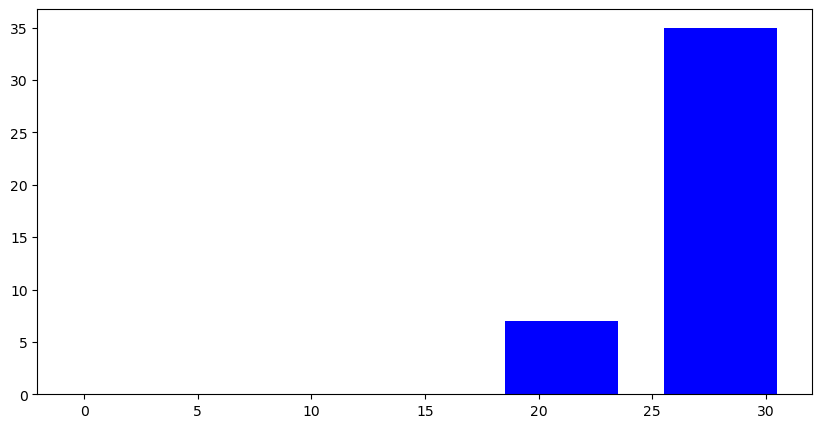

Number of null values per column in cleaned data: 0


In [65]:
# Comparing the null count between two versions of the scenario one
# dataset (before and after data cleaning).

old_count = old_monthly_provisional_data.isna().sum()
new_count = monthly_provisional_data.isna().sum().sum()
print("Number of null values per column in raw data: \n%s\n\n" %old_count)


# Plotting the null value count of the raw dataset, prior to
# data cleaning.

x = [old_count.tolist(), new_count.tolist()]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(range(len(old_count)), x[0], color='blue',width = 1)
plt.bar(range(len(old_count)), x[1], color='orange')

plt.show()

print("Number of null values per column in cleaned data: %s" %new_count)

In [66]:
# Initial data cleaning and data transformations to prepare the datasets for scenario two.
# Dropping unnecessary columns from relevant datasets.

col3_to_remove = ['ICD10_codes', 'Start Date', 'End Date', 'Flag', 'Number of Mentions']
contributing_conditions_data = drop_columns(col3_to_remove, contributing_conditions_data)

oasis_demographics_data = oasis_demographics_data[oasis_demographics_data['Group']=='Demented']

col5_to_remove = ['Educ','Delay']
oasis_cross_sectional_data = drop_columns(col5_to_remove, oasis_cross_sectional_data)

alzheimer_data = alzheimer_data[alzheimer_data['Group']=='Demented']


datasets2 = {'Contributing Contributions Dataset': contributing_conditions_data,
             'Oasis Longitudinal Demographics Dataset': oasis_demographics_data,
             'Oasis Cross-sectional Demographics Dataset': oasis_cross_sectional_data, 
             'Alzheimver Features Dataset': alzheimer_data}


In [67]:
# Removing special characters from monthly provisional dataset feature names. This helps in simplifying data
# processing and model training.

monthly_provisional_data.columns = monthly_provisional_data.columns.str.replace(' ', '')
monthly_provisional_data.columns = monthly_provisional_data.columns.str.replace('-', '')
monthly_provisional_data.columns = monthly_provisional_data.columns.str.replace('(', '')
monthly_provisional_data.columns = monthly_provisional_data.columns.str.replace(')', '')
monthly_provisional_data.columns = monthly_provisional_data.columns.str.replace(',', '')
monthly_provisional_data.columns = monthly_provisional_data.columns.str.replace('/', '')

/var/folders/k1/f3l1yym17tl9cvqg5972snr00000gn/T/ipykernel_13055/2519984467.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  monthly_provisional_data.columns = monthly_provisional_data.columns.str.replace('(', '')
/var/folders/k1/f3l1yym17tl9cvqg5972snr00000gn/T/ipykernel_13055/2519984467.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  monthly_provisional_data.columns = monthly_provisional_data.columns.str.replace(')', '')


### CONCLUSION OF THE DATA CLEANING PROCESS
Previous efforts of data cleaning led to failure when it came to applying the model approach for both scenarios. The reason for this was because missing entries were still present in the modified datasets for both scenarios, even after data cleaning. To conduct more thorough data cleaning, I established the previously mentioned null threshold value and 'helper' functions to improve the cleaning process for all involved datasets.

### EXPLORATORY DATA ANALYSIS (EDA) FOR SCENARIO ONE

Regarding the EDA process for scenario one, the first step is to generate a correlation matrix and a series of pair plots for the updated montly provisional dataset. The goal of these visualizations is to see the correlations between features and determine where strong correlations and collinearity resides. As a result, the analysis concludes that there is strong correlation between many of the features in the dataset, as indicated in the following correlation matrix and pair plots. Also, according to the following correlation matrix, there is strong multicollinearity as well between features.  

Further evaluation and metrics is needed to determine the effectiveness of different disease types as column features when tested with the types of causes of deaths. These features (including "AlzheimerDisease") are used in the formation of the associated multilinear regression models. The various disease features are tested with multiple predicting factors, including 'AllCause', 'COVID19MultipleCauseofDeath', and 'COVID19UnderlyingCauseofDeath'. 

The reason there are multiple predicting factors (and in turn, multiple iterations of the multilinear regression model) is because I specifically want to see how effective the column feature "AlzheimerDisease" is in the case of different types of causes of death (i.e. natural causes, as an underlying cause related to COVID19, etc.).

In [68]:
# Importing addition Python libraries to create visualizations as well as create and apply machine learning models 
# for both scenarios

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

/var/folders/k1/f3l1yym17tl9cvqg5972snr00000gn/T/ipykernel_13055/1529644853.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = monthly_provisional_data.corr()


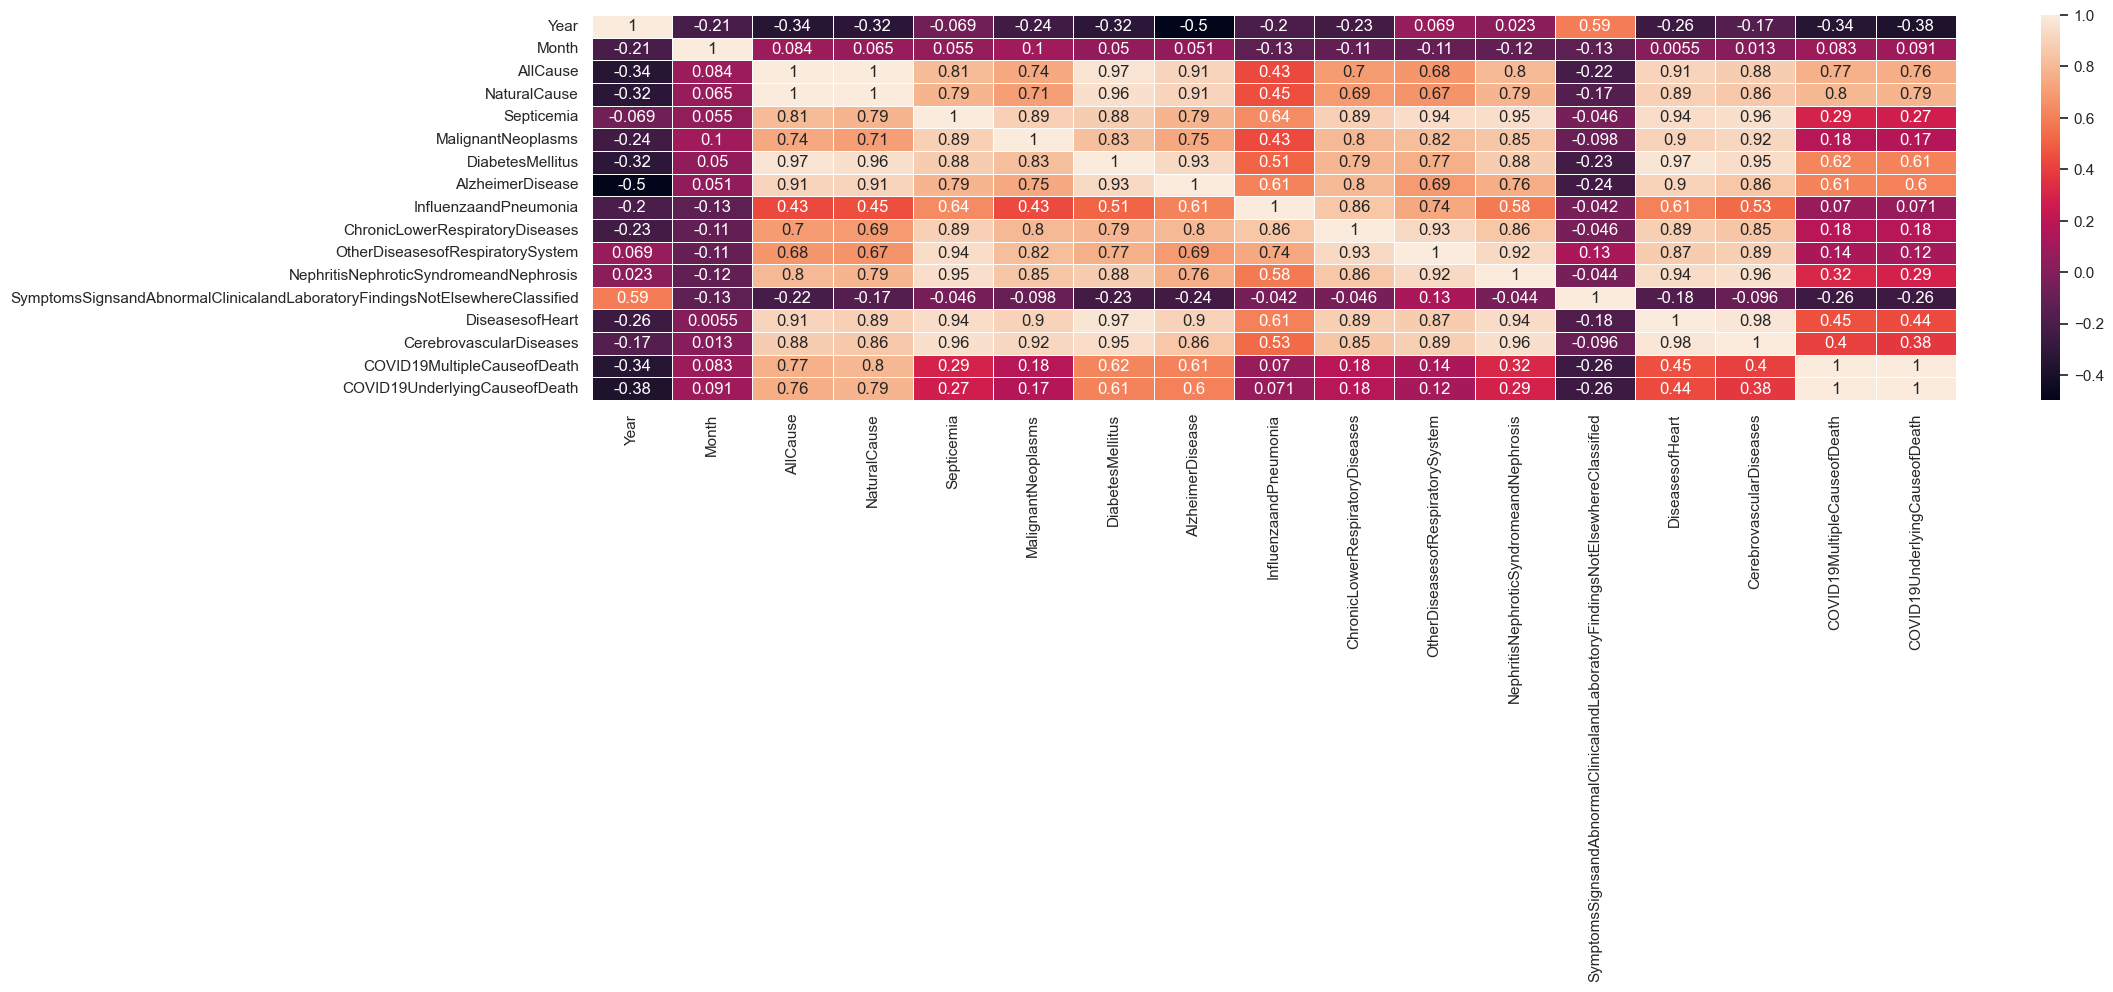

In [69]:
# Plotting the correlation matrix for the scenario one dataset.
corr_matrix = monthly_provisional_data.corr()
fig, ax = plt.subplots(figsize=(22, 5))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5)
plt.savefig('correlation_matrix.png', dpi = 300, bbox_inches = 'tight')

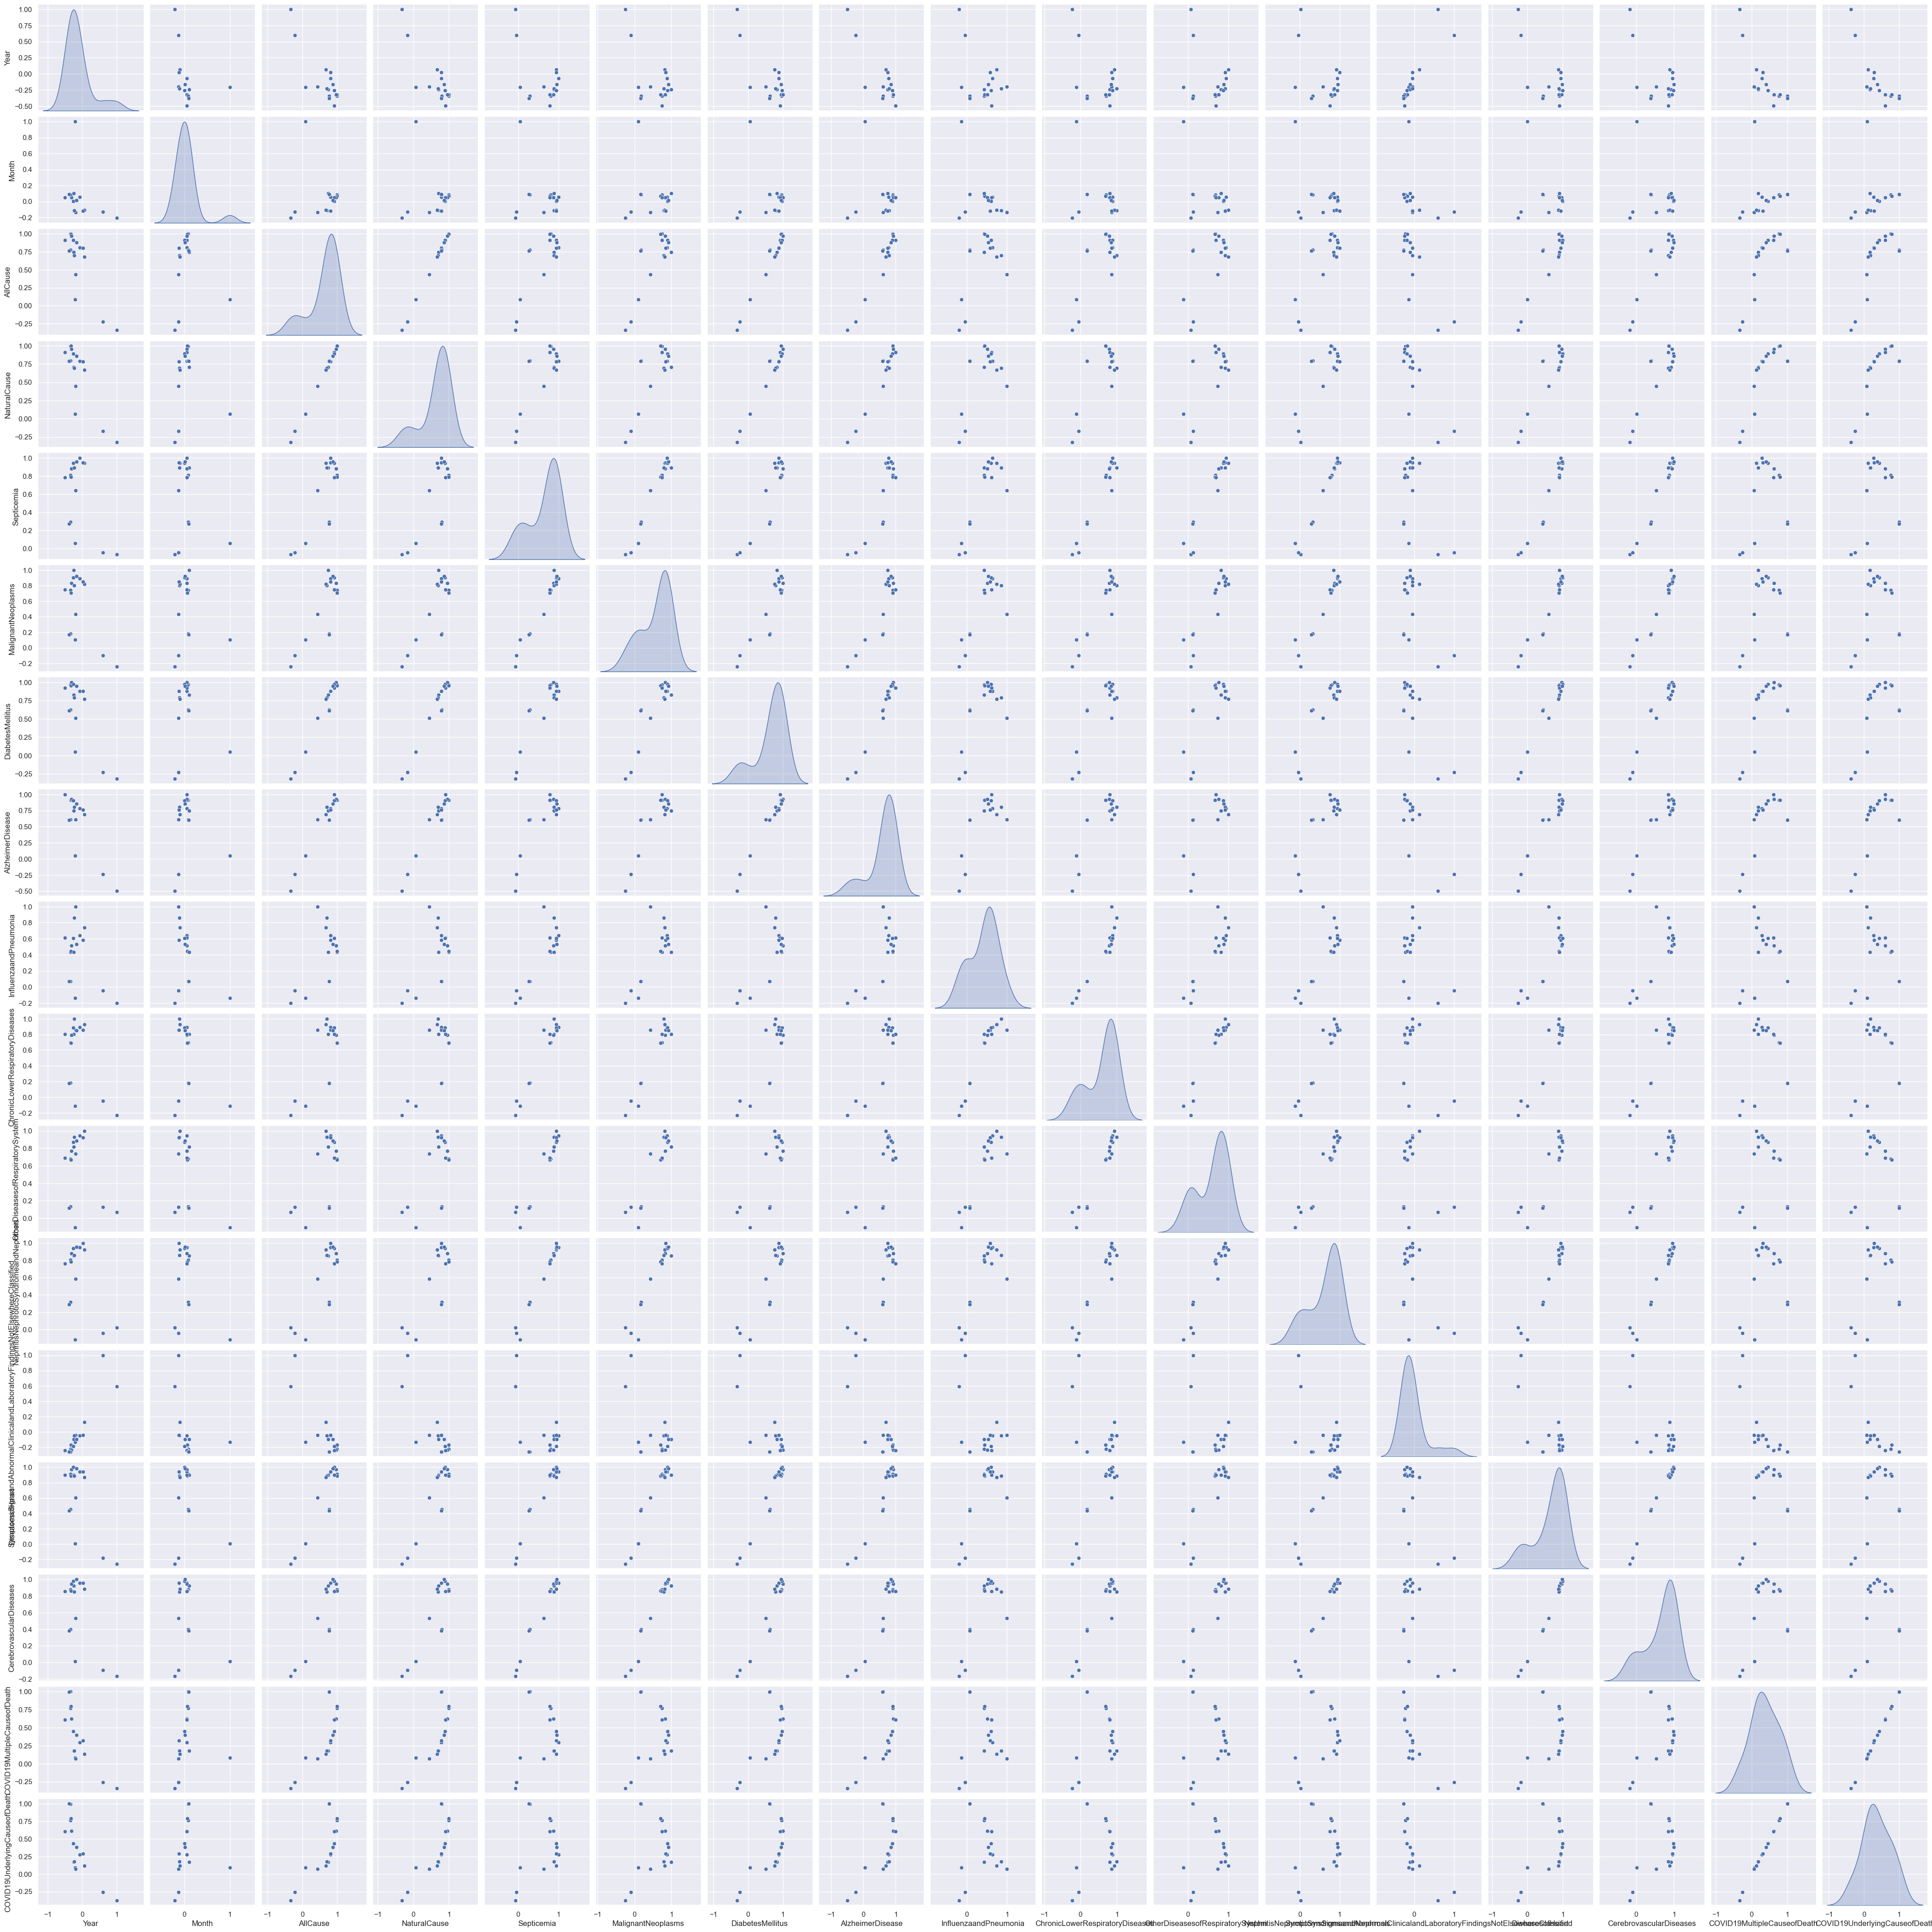

In [70]:
# Plotting a series of pair plots for the scenario one dataset
sns.pairplot(corr_matrix, diag_kind='kde')
plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')

### MULTILINEAR REGRESSION MODEL ANALYSIS FOR SCENARIO ONE

For the next part, I use a series of multilinear regression models to test different types of death causes with 'AlzheimerDisease' and other disease types found as dataset features. The main focus here is on the model summary results for 'p-values' for the different features and discover any patterns that may envelop. Any features that are found with a 'p-value' less than 0.05 are considered ineffective and not considered good factors when tested with the corresponding predicting features.

In [71]:
# Creating the first iteration of the Multilinear Regression model with 'AllCause' as the predicting label.
x = monthly_provisional_data[['MalignantNeoplasms', 'DiabetesMellitus','DiseasesofHeart','AlzheimerDisease',
                             'InfluenzaandPneumonia', 'ChronicLowerRespiratoryDiseases', 'OtherDiseasesofRespiratorySystem',
                             'DiseasesofHeart']]
y = monthly_provisional_data[['AllCause']]
regr = linear_model.LinearRegression()
regr.fit(x, y)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

In [72]:
# Generating the model summary and evaluation metrics for scenario one
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AllCause   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     136.3
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           5.63e-23
Time:                        20:59:17   Log-Likelihood:                -439.56
No. Observations:                  42   AIC:                             895.1
Df Residuals:                      34   BIC:                             909.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             7829.8612   1.41e+04      0.554      0.583   -2.09e+04    3.65e+04
MalignantNeoplasms                  -0.7712      0.969     -0.796      0.432      -2.740       1.197
DiabetesMellitus                    49.9709      9.938      5.028      0.000      29.775      70.167
DiseasesofHeart                     -2.0285      1.151     -1.762      0.087      -4.368       0.311
AlzheimerDisease                     7.0316      3.323      2.116      0.042       0.279      13.785
InfluenzaandPneumonia               -4.7917      3.937     -1.217      0.232     -12.792       3.208
ChronicLowerRespiratoryDiseases      0.3633      5.382      0.068      0.947     -10.574      11.301
OtherDiseasesofRespiratorySystem    16.7025      9.921      1.683      0.101      -3.460      36.865
DiseasesofHeart                     -2.0285      1.151     -1.762      0.087      -4.368       0.311
==============================================================================
Omnibus:                        1.254   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.117
Skew:                           0.382   Prob(JB):                        0.572
Kurtosis:                       2.764   Cond. No.                     1.43e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
# Creating the second iteration of the Linear Regression model with 'COVID19MultipleCauseofDeath' as the predicting label.
x = monthly_provisional_data[['MalignantNeoplasms', 'DiabetesMellitus','DiseasesofHeart','AlzheimerDisease',
                             'InfluenzaandPneumonia', 'ChronicLowerRespiratoryDiseases', 'OtherDiseasesofRespiratorySystem',
                             'DiseasesofHeart']]
y = monthly_provisional_data[['COVID19MultipleCauseofDeath']]
regr = linear_model.LinearRegression()
regr.fit(x, y)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()

In [74]:
# Generating the model summary and evaluation metrics for scenario one (second iteration)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     COVID19MultipleCauseofDeath   R-squared:                       0.883
Model:                                     OLS   Adj. R-squared:                  0.859
Method:                          Least Squares   F-statistic:                     36.65
Date:                         Mon, 26 Jun 2023   Prob (F-statistic):           4.93e-14
Time:                                 20:59:18   Log-Likelihood:                -441.40
No. Observations:                           42   AIC:                             898.8
Df Residuals:                               34   BIC:                             912.7
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.583e+04   1.48e+04      1.073      0.291   -1.42e+04    4.58e+04
MalignantNeoplasms                  -3.3477      1.012     -3.308      0.002      -5.405      -1.291
DiabetesMellitus                    48.2608     10.383      4.648      0.000      27.160      69.362
DiseasesofHeart                     -2.8382      1.203     -2.360      0.024      -5.282      -0.394
AlzheimerDisease                     7.2680      3.472      2.093      0.044       0.212      14.324
InfluenzaandPneumonia               -6.3079      4.113     -1.534      0.134     -14.666       2.050
ChronicLowerRespiratoryDiseases      1.1252      5.623      0.200      0.843     -10.302      12.553
OtherDiseasesofRespiratorySystem     9.8939     10.366      0.954      0.347     -11.172      30.960
DiseasesofHeart                     -2.8382      1.203     -2.360      0.024      -5.282      -0.394
==============================================================================
Omnibus:                        1.176   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.190
Skew:                           0.347   Prob(JB):                        0.552
Kurtosis:                       2.556   Cond. No.                     1.43e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
# Creating the third iteration of the Linear Regression model with 'COVID19UnderlyingCauseofDeath' as the predicting label.
x = monthly_provisional_data[['MalignantNeoplasms', 'DiabetesMellitus','DiseasesofHeart','AlzheimerDisease',
                             'InfluenzaandPneumonia', 'ChronicLowerRespiratoryDiseases', 'OtherDiseasesofRespiratorySystem',
                             'DiseasesofHeart']]
y = monthly_provisional_data[['COVID19UnderlyingCauseofDeath']]
regr = linear_model.LinearRegression()
regr.fit(x, y)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()

# Generating the model summary and evaluation metrics for scenario one (third iteration)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     COVID19UnderlyingCauseofDeath   R-squared:                       0.872
Model:                                       OLS   Adj. R-squared:                  0.845
Method:                            Least Squares   F-statistic:                     33.04
Date:                           Mon, 26 Jun 2023   Prob (F-statistic):           2.25e-13
Time:                                   20:59:20   Log-Likelihood:                -440.29
No. Observations:                             42   AIC:                             896.6
Df Residuals:                                 34   BIC:                             910.5
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.522e+04   1.44e+04      1.059      0.297    -1.4e+04    4.44e+04
MalignantNeoplasms                  -2.7476      0.986     -2.788      0.009      -4.751      -0.745
DiabetesMellitus                    49.1374     10.111      4.860      0.000      28.588      69.686
DiseasesofHeart                     -3.2329      1.171     -2.760      0.009      -5.613      -0.853
AlzheimerDisease                     6.4606      3.381      1.911      0.064      -0.410      13.331
InfluenzaandPneumonia               -5.8816      4.005     -1.468      0.151     -14.021       2.258
ChronicLowerRespiratoryDiseases      3.2700      5.476      0.597      0.554      -7.858      14.398
OtherDiseasesofRespiratorySystem     6.1158     10.095      0.606      0.549     -14.399      26.631
DiseasesofHeart                     -3.2329      1.171     -2.760      0.009      -5.613      -0.853
==============================================================================
Omnibus:                        0.911   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.974
Skew:                           0.290   Prob(JB):                        0.615
Kurtosis:                       2.532   Cond. No.                     1.43e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### MULTILINEAR REGRESSION EVALUATION METRICS RESULTS FOR SCENARIO ONE

Evaluation metrics show that, from the three iterations of the multilinear regression model, the first and second iterations (with 'AllCause' and 'COVID19MultipleCauseofDeath' as the predicting features) showed 'AlzheimerDisease' as an significant feature. In addition to this result, the first and second iterations also produced high r-squared values of 0.966 and 0.883, respectively. Future tests can be done to explore other predicting factors, but as of now, I have been able to show effectiveness of the 'AlzheimerDisease' feature with this model approach.

### DATA CLEANING READOUTS AND RESULTS (SCENARIO TWO)

The following output information will show a comparison of the scenario two datasets, counting the number of null values before and after the cleaning process.

In [76]:
# 'Helper' function that forms the final version of the dataset for scenario 2.
def transform_dataset2(datasets, limit):
    new_dataset = {}

    new_dataset['age'] = []
    new_dataset['sex'] = []

    for dataset in datasets.values():
        new_dataset['age'].extend(dataset[col].tolist()[:limit] for col in dataset if col in 'Age')
        new_dataset['sex'].extend(dataset[col].tolist()[:limit] for col in dataset if col in 'M/F')
        
    all_ages = []
    genders = []
    group = []
    
    for age_,sex_ in zip(new_dataset['age'], new_dataset['sex']):
        all_ages += age_
        genders += sex_
        
    for ind in range(len(genders)):
        if genders[ind] == 'M':
            genders[ind] = 0
        else:
            genders[ind] = 1
    
    new_dataset['age'] = all_ages
    new_dataset['sex'] = genders

    return pd.DataFrame.from_dict(new_dataset)


In [77]:
scenario2_data = transform_dataset2(datasets2, 300)

In [78]:
# Prints out information on the null value counts for the scenario 2 dataset (before and after data clearning).
temp = []

for key,dataset in datasets2.items():
    print("Total number of null count values for dataset: %s is the following: \n%s\n"%(key, dataset.isna().sum()))
    temp.append(dataset.isna().sum().tolist())

print("Total number of null count values for MODIFIED dataset is the following: \n\n%s\n"%scenario2_data.isna().sum())

Total number of null count values for dataset: Contributing Contributions Dataset is the following: 
Data As Of              0
Group                   0
Year                12420
Month               62100
State                   0
Condition Group         0
Condition               0
Age Group               0
COVID-19 Deaths    170909
dtype: int64

Total number of null count values for dataset: Oasis Longitudinal Demographics Dataset is the following: 
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Total number of null count values for dataset: Oasis Cross-sectional Demographics Dataset is the following: 
ID        0
M/F       0
Hand      0
Age       0
SES     220
MMSE    201
CDR     201
eTIV      0
nWBV      0
ASF       0
dtype: int64

Total number of null count values

### EXPLORATORY DATA ANALYSIS (EDA) FOR SCENARIO TWO

For scenario two, I utilize a 'helper' function (as shown above) to extract desired features from the three selected datasets (in this case, I am focusing on age and gender as our features). To further explore the modified data, I generated histograms to observe the frequency of male and female patients with Alzheimer's disease across different ages. 

The histograms reveal that there are a higher number of male patients than female patients who have Alzheimer's disease, and that the highest number of patients (male and female) that have Alzheimer's disease are between the ages of 66 and 88. Unfortunately, the correlation was found to be not good between 'age' and 'gender' features. However, I decided to apply a logistic regression model since the 'age' feature results (in this case) to a binary outcome. For future datasets, a different model approach may be needed, since not all patients identify as 'male' nor 'female'. However, in this case, all three datasets that shared the 'gender' feature had binary results, so it seems appropriate to utilize a logistic regression model. 

Text(0.5, 1.0, "Frequency of Females with Alzheimer's Disease by Age")

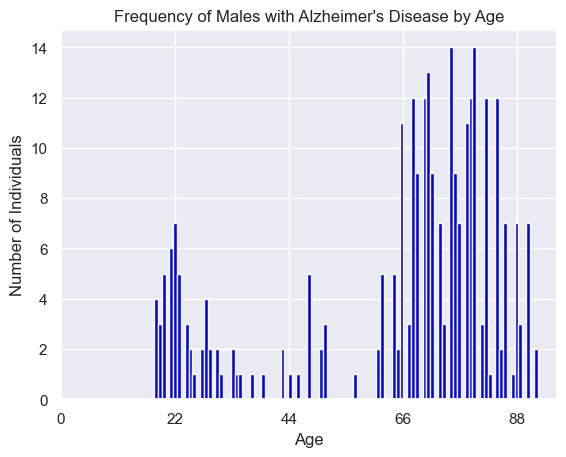

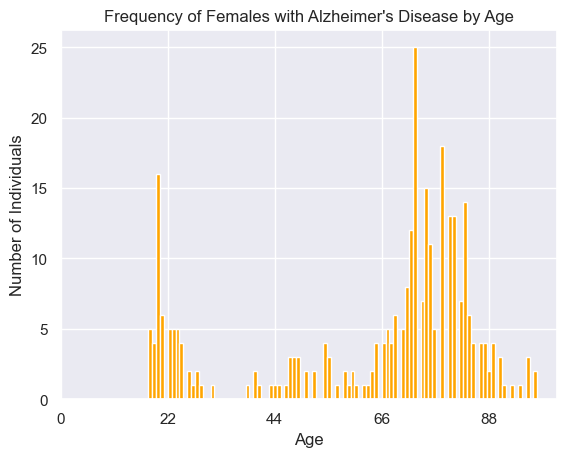

In [91]:
# Generates a set of histograms to display the frequency of patients with Alzheimer's disease (by gender) that
# varies by age.

scenario2_data[scenario2_data['sex']==0].hist(column='age', color='blue', bins= 100)
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.xticks(np.arange(0, 100, 22))
plt.title("Frequency of Males with Alzheimer's Disease by Age")
scenario2_data[scenario2_data['sex']==1].hist(column='age', color='orange', bins=100)
plt.xticks(np.arange(0, 100, 22))
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.title("Frequency of Females with Alzheimer's Disease by Age")

### LOGISTIC REGRESSION MODEL ANALYSIS FOR SCENARIO TWO



In [110]:
# Forms the first iteration of the logistic regression for scenario 2.

X = scenario2_data.iloc[:, :-1].values
y = scenario2_data.iloc[:,-1].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state=5)

LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

### LOGISTIC REGRESSION EVALUATION METRICS RESULTS FOR SCENARIO ONE

For evaluation metrics purposes, I am setting up not only one, but two iterations of logistic regression models with the dataset for scenario two. Multiple logistic regression models will help to determine which hyperparameters to tune or modify so that I can find a way to improve the model accuracy, if necessary.

Initally, I use the entire modified scenario 2 dataset with a random state value of '5' when the model is created. However, when plotting the calculated true and false positive rates, the associated AUC value results to be 0.40 (lower than the standard of 0.50, which makes it an ineffective model). The model accuracy is also found to be 0.50.

To improve model performance and accuracy, I decided to change the size of the training and test data as well as the random state when recreating the logistic regression model. The following changes were made in an attempt to increase model performance: conducted dataset pruning to decrease the size of the training and test data, and increased the random state value in order to further shuffle the data before splitting it.

As a result of the changes, the logistic regression model improved in performance and the metrics revealed a higher AUC value of 0.64 (better than 0.50, which makes it a more improved model). Model accuracy increased as well to a value of 0.61.

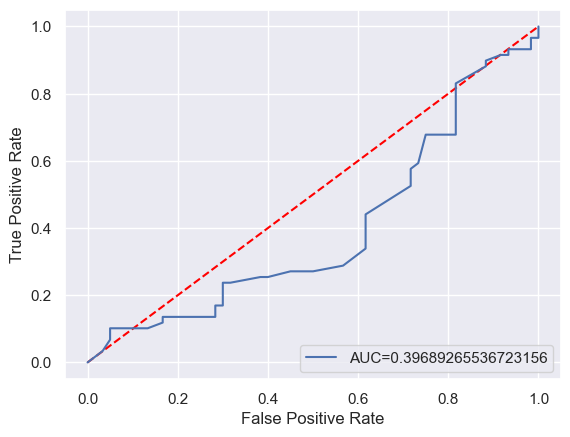

In [111]:
# Ploting the ROC curve and AUC metrics for the logistic regression model
from sklearn import metrics

# your code here
y_pred_score = LogReg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_score)
auc = metrics.roc_auc_score(y_test, y_pred_score)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [112]:
# Computing the model accuracy score
y_pred = LogReg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5042016806722689


In [105]:
# Forms the second iteration of the logistic regression model, with a decreased test size and increased random state
b = transform_dataset2(datasets2, 50)
X = b.iloc[:, :-1].values
y = b.iloc[:,-1].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state=50)

LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

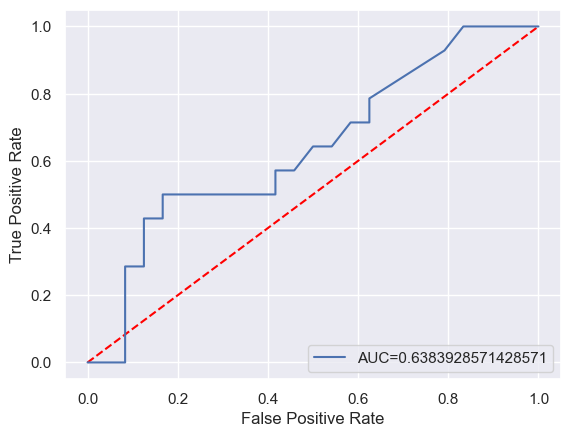

In [106]:
y_pred_score = LogReg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_score)
auc = metrics.roc_auc_score(y_test, y_pred_score)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [107]:
y_pred = LogReg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6052631578947368


### SUMMARY OF RESULTS AND ANALYSIS

For both scenarios, the option was chosen to iterate and tune hyperparameters for both respective models until I noticed an improvement in model performance or achieved a desired outcome. In the case of scenario one, I changed the predicting features based on the given conditions (determine if Alzheimer's disease is impactful for any of the chosen predicting features. As a result, I found that the 'AlzheimerDisease' feature was significant in the case where 'COVID19MultipleCauseofDeath' and 'AllCause' were the predicting features.

In scenario two, I witnessed how the dataset size, random state, and how the input data is split could affect the logistic regression model accuracy and AUC metrics. Dataset pruning and increasing the random state led to an improvement in model performance in accuracy. However, further tests will need to be made in the future. Even though I witnessed an increase in model performance, I need to perform future tests with larger scales of data to make sure model performance is maintainable. In the likelihood that model performance does decrease with larger scales of data, I know that tuning the hyperparameters and data pruning are effective methods in case I need to improve model performance.

### DISCUSSION AND CONCLUSION

In the end, I was able to achieve initial objectives: confirm if Alzheimer's Disease is an impactful feature in the multilinear regression model in scenario one, see if whether or not age and gender have a good correlation in scenario two, and verify if there are methods to improve the logistic regression model in scenario two.

The main takeaways and lessons learned from scenario one are the impact of data cleaning and utilizing multiple predicting features for the associated regression model. Before achieving success with the multilinear regression model in its current state, I encountered errors with certain features that remained in the input dataset. Occurring errors were a result of missing values still present in the dataset, and my previous efforts of data cleaning were not working properly. This led me to establish a null threshold value in order to limit the number of features that remained in the main dataset. As a result, I have learned how important the data cleaning process can be and how critical of a role it plays in data preparation and in data transformations.

For scenario two, I encountered a challenge with the lack of correlation between my selected features for patients with Alzheimer's disease: age and gender. Unfortunately, the correlation between both features was not good, even though these were shared features that were extracted from three datasets with the same associated time period. For future tests and improvement, I would test a similar scenario but with different data to verify if I get different correlation results with similar features. I have learned that even though a scenario did not achieve a desired outcome with the given data, it always helps to verify scenario results with different datasets. Even though I could not find good correlation here with the given features, I did find two methods to improve the model accuracy and performance: dataset pruning and increased shuffling of data. These are methods that I plan to keep in mind for future scenarios in case I encounter similar challenges with model accuracy and performance.